In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm, probplot
import scipy as sp

# Homework 1

In [34]:
cost = pd.read_excel('//Users/suyeonkim/Documents/IAA/Spring 1/Simulation and Risk/Homework2_SR/Analysis_Data.xlsx', sheet_name= 'Drilling Cost' , skiprows = 2)
price = pd.read_excel('//Users/suyeonkim/Documents/IAA/Spring 1/Simulation and Risk/Homework2_SR/Analysis_Data.xlsx', sheet_name= 'Price Projections' , skiprows = 2)


In [35]:
cost.columns

Index(['Date',
       'U.S. Nominal Cost per Crude Oil Well Drilled (Thousand Dollars per Well)',
       'U.S. Nominal Cost per Natural Gas Well Drilled (Thousand Dollars per Well)',
       'U.S. Nominal Cost per Dry Well Drilled (Thousand Dollars per Well)',
       'Arithmetic Return - Crude Oil', 'Arithmetic Return - Natural Gas',
       'Arithmetic Return - Dry Well'],
      dtype='object')

In [36]:
price.columns

Index(['Year', 'High Oil Price', 'Low Oil Price', 'AEO2023 Reference'], dtype='object')

In [37]:
cost['Date'] = pd.to_datetime(cost['Date'])
cost = cost[(cost['Date'] >= "1991-01-01") & (cost['Date'] <= "2006-12-31")]
#cost['Avg Return'] = (cost["Arithmetic Return - Crude Oil"] + cost["Arithmetic Return - Dry Well"] + cost["Arithmetic Return - Natural Gas"])/3
#cost['Avg Return'] = pd.to_numeric(cost['Avg Return'], errors='coerce')

cost['Avg Cost'] = (cost["U.S. Nominal Cost per Crude Oil Well Drilled (Thousand Dollars per Well)"] + cost["U.S. Nominal Cost per Dry Well Drilled (Thousand Dollars per Well)"] + cost["U.S. Nominal Cost per Natural Gas Well Drilled (Thousand Dollars per Well)"])/3
cost['Avg Cost'] = pd.to_numeric(cost['Avg Cost'], errors='coerce')

cost['Arithmetic Return - Crude Oil'] = pd.to_numeric(cost['Arithmetic Return - Crude Oil'], errors='coerce')
cost['Arithmetic Return - Dry Well'] = pd.to_numeric(cost['Arithmetic Return - Dry Well'], errors='coerce')
cost['Arithmetic Return - Natural Gas'] = pd.to_numeric(cost['Arithmetic Return - Natural Gas'], errors='coerce')

In [38]:
cost


,Date,U.S. Nominal Cost per Crude Oil Well Drilled (Thousand Dollars per Well),U.S. Nominal Cost per Natural Gas Well Drilled (Thousand Dollars per Well),U.S. Nominal Cost per Dry Well Drilled (Thousand Dollars per Well),Arithmetic Return - Crude Oil,Arithmetic Return - Natural Gas,Arithmetic Return - Dry Well,Avg Cost
31,1991-06-30,346.9,506.6,441.2,0.077999,0.074899,0.200544,431.566667
32,1992-06-30,362.3,426.1,357.6,0.044393,-0.158902,-0.189483,382.000000
33,1993-06-30,356.6,521.2,387.7,-0.015733,0.223187,0.084172,421.833333
34,1994-06-30,409.5,535.1,491.5,0.148345,0.026669,0.267733,478.700000
35,1995-06-30,415.8,629.7,481.2,0.015385,0.176789,-0.020956,508.900000
36,1996-06-30,341.0,616.0,541.0,-0.179894,-0.021756,0.124273,499.333333
37,1997-06-30,445.6,728.6,655.6,0.306745,0.182792,0.211830,609.933333
38,1998-06-30,566.0,815.6,973.2,0.270197,0.119407,0.484442,784.933333
39,1999-06-30,783.0,798.4,1115.5,0.383392,-0.021089,0.146219,898.966667
40,2000-06-30,593.4,756.9,1075.4,-0.242146,-0.051979,-0.035948,808.566667


### Check normality

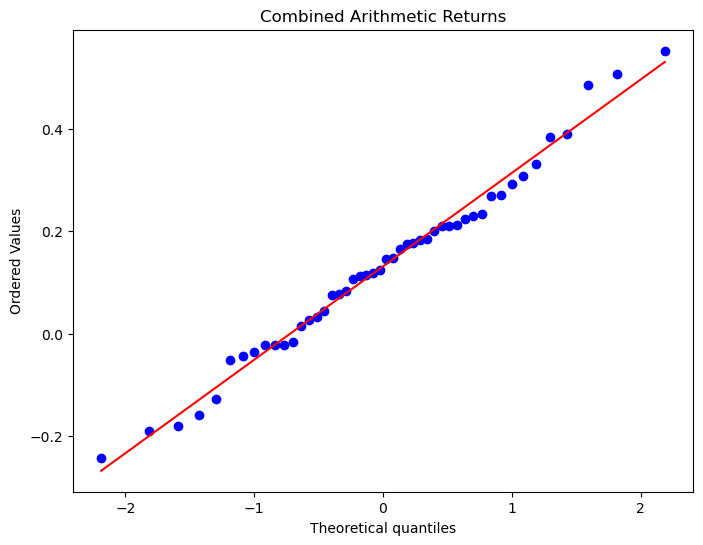

In [39]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

arithmetic_changes = cost[["Arithmetic Return - Natural Gas", "Arithmetic Return - Dry Well", "Arithmetic Return - Crude Oil"]].values

all_data = arithmetic_changes.flatten()

#QQplot
fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(all_data, dist="norm", plot=ax)
ax.set_title('Combined Arithmetic Returns')

plt.show()


### Simulation with Normal Distribution

In [40]:
arithmetic_changes= cost[["Arithmetic Return - Natural Gas", "Arithmetic Return - Dry Well", "Arithmetic Return - Crude Oil"]].values.tolist()
arithmetic_changes = np.array(arithmetic_changes)
flat_arithmetic_changes = [item for sublist in arithmetic_changes for item in sublist]

In [41]:
np.mean(flat_arithmetic_changes)

0.13149126581580003

In [42]:
np.std(flat_arithmetic_changes)

0.17656869616614107

In [43]:
np.random.seed(112358)

data = []
arithmetic_changes= cost[["Arithmetic Return - Natural Gas", "Arithmetic Return - Dry Well", "Arithmetic Return - Crude Oil"]].values.tolist()
arithmetic_changes = np.array(arithmetic_changes)
flat_arithmetic_changes = [item for sublist in arithmetic_changes for item in sublist]
P0 = 2279800


data = []
for i in range(500000):

   
    Pt = P0 * (1 + ret)
  
    # normal dist for 2006-2012
    for j in range(7):
        ret = np.random.normal(loc = 0.131, scale = 0.178)
        Pt = Pt * (1 + ret)
    # triangular dist for 2012-2015
    for j in range(3):
        ret = np.random.triangular(left = -0.22, mode = -0.0917, right = -0.07)
        Pt = Pt * (1 + ret)
    # triangular dist for 2015-2026
    for j in range(11):
        ret = np.random.triangular(left = 0.02, mode = 0.05, right = 0.06)
        Pt = Pt * (1 + ret)
        
    data.append(Pt)
  

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


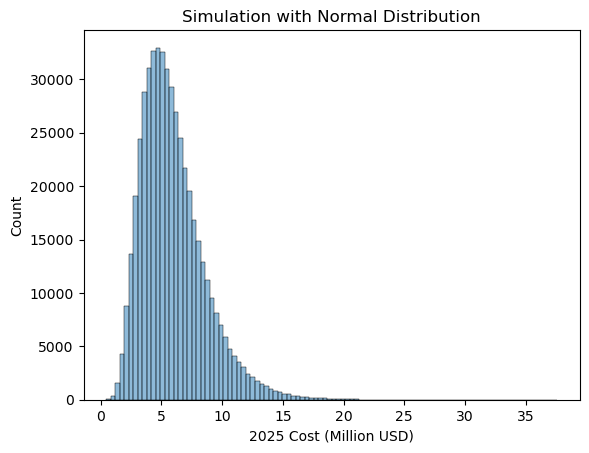

In [46]:
df = pd.DataFrame(data)

#histogram
ax = sns.histplot(data=df / 1e6, bins=100)

ax.set_xlabel("2025 Cost (Million USD)")
ax.set_title("Simulation with Normal Distribution")

#remove legend
if ax.legend_:
    ax.legend_.remove()

plt.show()

# Homework 2

In [47]:
dry_well_cost = df.to_numpy()
dry_well_cost = dry_well_cost.flatten()

### Dry Well Cost

In [48]:
simulation_size = 500000

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


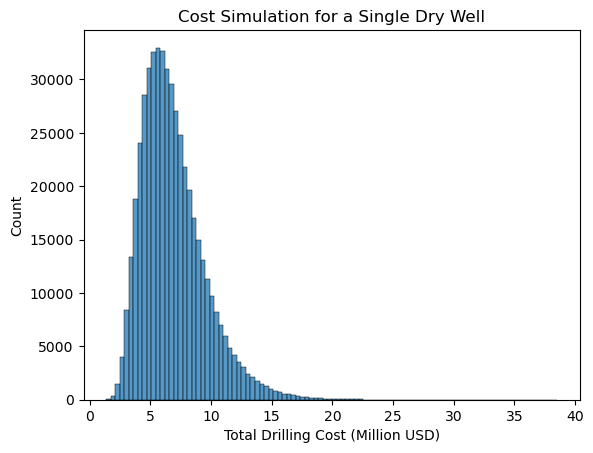

In [49]:
# Seismic and lease costs
leased_acres_per_well = np.random.normal(600, 50, simulation_size)
seismic_sections_per_well = np.random.normal(3, 0.35, simulation_size)

price_per_acre = 960
seismic_cost_per_section = 43000

lease_costs = leased_acres_per_well * price_per_acre
seismic_costs = seismic_sections_per_well * seismic_cost_per_section


# Completion Costs
completion_costs = np.random.normal(390000, 50000, simulation_size)

# Professional overhead
prof_overhead_costs = np.random.triangular(left=172000, mode=215000, right=279500, size= simulation_size)

# Cost of single dry well
total_dry_drilling_costs = dry_well_cost + lease_costs + seismic_costs + prof_overhead_costs
total_dry_drilling_costs = total_dry_drilling_costs.flatten()

# Plot Distribution
ax = sns.histplot(data=total_dry_drilling_costs/1e6, bins=100)
ax.set(xlabel="Total Drilling Cost (Million USD)")
ax.set_title('Cost Simulation for a Single Dry Well')
plt.show()


In [50]:

median_dry_drilling_cost = np.median(total_dry_drilling_costs)
print("Median Dry Drilling Cost:", median_dry_drilling_cost)

Median Dry Drilling Cost: 6439449.829609517


### NPV of Wet Well

In [52]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy.linalg as sp
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(112358)

# Simulation settings
simSize = 500000
num_years = 15

# **Seismic & Lease Costs**
leased_acres_per_well = np.random.normal(600, 50, simSize)
seismic_sections_per_well = np.random.normal(3, 0.35, simSize)

price_per_acre = 960
seismic_cost_per_section = 43000

lease_costs = leased_acres_per_well * price_per_acre
seismic_costs = seismic_sections_per_well * seismic_cost_per_section

# **Completion & Overhead Costs**
completion = np.random.normal(390000, 50000, simSize)
overhead = np.random.triangular(172000, 215000, 279500, simSize)


# **Lognormal to Normal Conversion for Initial Production (IP)**
log_avg = 420
log_std = 120
sigma_normal = np.sqrt(np.log(1 + (log_std / log_avg) ** 2))
mean_normal = np.log(log_avg) - sigma_normal**2 / 2

# **Initial Production (IP) & Decline Rate**
IP = np.random.lognormal(mean=6, sigma=0.28, size=simSize)
decline = np.random.uniform(0.15, 0.32, size=simSize)

# **Apply Correlation between IP and Decline Rate**
R = np.array([[1, 0.64], [0.64, 1]])
U = sp.cholesky(R, lower=False)

def standardize(x):
    return (x - np.mean(x)) / np.std(x)

def destandardize(x_std, x_original):
    return x_std * np.std(x_original) + np.mean(x_original)

both_vars = np.array([standardize(IP), standardize(decline)])
correlated_vars = U @ both_vars
final_rate = np.array([destandardize(correlated_vars[0], IP), destandardize(correlated_vars[1], decline)])

# **Revenue Interest**
interest = np.random.normal(0.75, 0.02, size=simSize)

# **Initialize NPV Calculation**
yearBegin = np.array(final_rate[0])
npv = -(total_dry_drilling_costs + completion)



NPV Min/Max:  -17576492.13388392 102471143.92618935


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


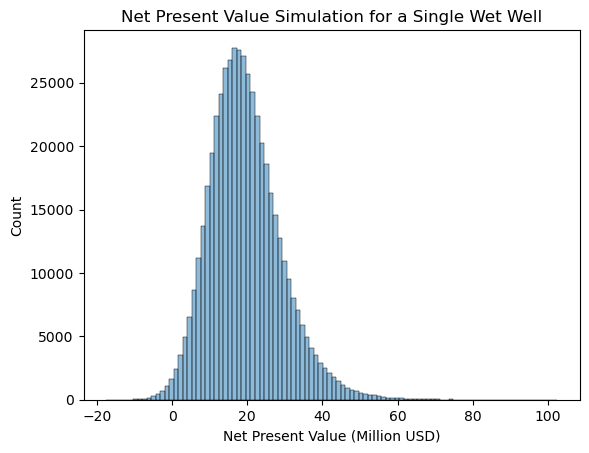

In [53]:
price['Year'] = price['Year'].astype(int)

for i in range(15):
    yearEnd = yearBegin * (1 - final_rate[1])
    
    production = 365 * (yearBegin + yearEnd) / 2
    
    year_filter = price.loc[price['Year'] == (2026 + i)]
    if not year_filter.empty:
        low = year_filter.iloc[0]['Low Oil Price']
        high = year_filter.iloc[0]['High Oil Price']
        exp = year_filter.iloc[0]['AEO2023 Reference']
    else:
        print(f"Warning: Year {2026 + i} not found in price data")
        continue
    
    #oil price
    price_sim = np.random.triangular(low, exp, high, size=simSize)
    
    # Net Revenue & Severance Tax 
    revenue = production * price_sim * interest * (1 - 0.046)

    # operation cost
    operate = np.full(simSize, np.random.normal(loc=2.25, scale=0.3), dtype=float) 
    
    # npv
    npv += (revenue - operate - overhead) / (1.1 ** (i + 1))
        
    # update
    yearBegin = np.array(yearEnd).reshape(-1)  # reshape

# final NPV
print("NPV Min/Max: ", np.min(npv), np.max(npv))

# histo
ax = sns.histplot(data=pd.DataFrame(npv)/1e6, bins=100, legend=False)
ax.set(xlabel="Net Present Value (Million USD)", title="Net Present Value Simulation for a Single Wet Well")
plt.show()


In [54]:
print(np.median(npv))

18587690.63392386
